In [28]:
import pandas as pd
import cleaning_pipeline as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_cleaned.csv")
X, y = cp.altCleaning(data)

In [3]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2568, 204)
(2568,)
(856, 204)
(856,)


In [5]:
# using GridSearchCV with logistic regression 

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty":["l1","l2"]
}

lg_gs = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= params,
    cv= 5
)

In [6]:
# train the model 

lg_gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 pena

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [7]:
# see different combinations of parameters with accuracy after hypertuning 

pd.concat([pd.DataFrame(lg_gs.cv_results_["params"]),pd.DataFrame(lg_gs.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,penalty,solver,Accuracy
0,0.001,l1,newton-cg,NaN
1,0.001,l1,lbfgs,NaN
2,0.001,l1,liblinear,0.619549
3,0.001,l1,sag,NaN
4,0.001,l1,saga,0.619549
...,...,...,...,...
65,1000.000,l2,newton-cg,0.809187
66,1000.000,l2,lbfgs,0.812693
67,1000.000,l2,liblinear,0.809187
68,1000.000,l2,sag,0.809577


In [15]:
# view the best params and score for the respective param after applying GridSearchCV

print(lg_gs.best_params_)
print(lg_gs.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.8158099528978088


In [17]:
# testing the model
y_pred = lg_gs.predict(X_test)

In [24]:
# f1_score 

f1_score(y_test, y_pred, average='weighted')

0.810871829998107

[[479  65]
 [ 95 217]]


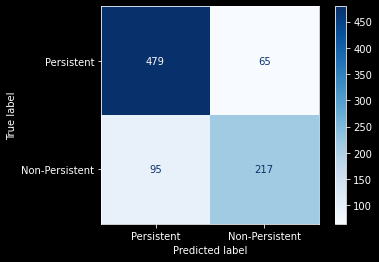

In [26]:
# confusion matrix

disp = plot_confusion_matrix(
    lg_gs,
    X_test,
    y_test,
    display_labels= ["Persistent", "Non-Persistent"],
    cmap= plt.cm.Blues
)

print(disp.confusion_matrix)

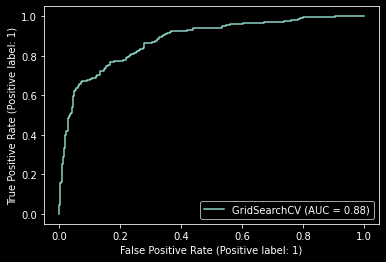

In [29]:
# ROC curve 

plot_roc_curve(lg_gs, X_test, y_test)
plt.show()